In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
def create_1x60_matrix(num,df):
    array = []
    i = num
    for i in range(i,i+10):
        array.append(df['aX'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['aY'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['aZ'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['gX'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['gY'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['gZ'].iloc[i])
    return array

In [161]:
def fill_data(size,df):
    df_new = pd.read_csv('datasets/1x60_d_shots/header.csv')
    i=0
    j=0
    while i <= size:
        df_new = pd.DataFrame(np.insert(df_new.values,j,values=create_1x60_matrix(i,df),axis=0))
        i = i + 10
        j = j+1
    return df_new

In [162]:
def record_capture(capture):
    df = pd.read_csv('datasets/test_shots/'+capture+'.csv')
    capt = fill_data(len(df)-1,df)
    capt = np.asarray(capt).astype('float32')
    
    return capt

In [163]:
shots = pd.read_csv('datasets/1x60_d_shots/shots.csv')
shots

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,forehand,topspin,bad form
0,-3.66,-4.00,-4.00,-4.00,-4.00,-4.00,-4.00,-2.48,-1.89,-1.36,...,-1202.21,-1053.65,-788.39,-445.98,-173.22,-2.14,133.91,1,1,0
1,-3.62,-4.00,-4.00,-4.00,-4.00,-4.00,-4.00,-3.45,-2.67,-1.95,...,-1210.33,-1238.22,-852.78,-485.78,-91.43,107.24,215.39,1,1,0
2,-4.00,-3.17,-1.94,-1.11,-0.75,-1.17,-1.38,-1.32,-1.27,-1.74,...,188.42,209.35,333.19,361.45,366.94,368.96,408.02,1,1,0
3,-3.71,-4.00,-4.00,-4.00,-4.00,-4.00,-4.00,-2.69,-1.74,-0.85,...,-1420.04,-1279.17,-895.20,-262.45,-106.45,31.01,132.51,1,1,0
4,-4.00,-4.00,-4.00,-4.00,-2.11,-0.91,-0.29,0.18,0.15,-0.11,...,-416.50,-104.37,50.11,57.86,102.97,86.06,99.91,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,-1.15,-1.38,-0.94,-0.25,-1.40,-2.02,-2.05,-1.04,0.01,-0.53,...,16.11,12.88,22.03,-53.10,-45.53,16.36,-19.71,0,0,1
1947,0.22,0.90,-0.17,-0.12,-0.25,1.10,0.41,-0.21,0.39,0.80,...,46.39,478.33,123.41,-301.51,-304.87,88.75,155.21,0,0,1
1948,0.19,0.38,0.26,-0.15,0.26,-0.05,0.51,0.59,0.09,-0.05,...,-44.01,-14.71,117.25,-102.17,-12.51,-28.20,0.49,0,0,1
1949,4.00,4.00,0.77,-2.81,-1.27,2.79,4.00,0.46,-2.84,-1.26,...,-108.09,77.21,180.73,-17.46,11.11,-96.80,73.49,0,0,1


In [164]:
from sklearn.utils import shuffle

In [165]:
shots = shuffle(shots)

In [166]:
X = shots.drop(['forehand','topspin','bad form'],axis=1).values

In [167]:
y = shots[['forehand','topspin','bad form']].values

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [170]:
X_train.shape

(1365, 60)

In [171]:
X_test.shape

(586, 60)

In [172]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
scalar = MinMaxScaler()

In [174]:
scalar.fit_transform(X_train)

array([[0.        , 0.        , 0.        , ..., 0.58414809, 0.50664969,
        0.49882586],
       [0.05      , 0.        , 0.        , ..., 0.50921504, 0.54040047,
        0.61114987],
       [0.        , 0.37125   , 0.26375   , ..., 0.5579917 , 0.41357392,
        0.41409159],
       ...,
       [0.        , 0.        , 0.        , ..., 0.46833503, 0.46220569,
        0.50950608],
       [0.        , 0.        , 0.        , ..., 0.46725171, 0.58830609,
        0.72683416],
       [0.        , 0.        , 0.34125   , ..., 0.5454756 , 0.42650526,
        0.34141309]])

In [175]:
scalar.transform(X_test)

array([[0.        , 0.        , 0.0175    , ..., 0.53237356, 0.39299321,
        0.35598416],
       [0.16625   , 0.        , 0.        , ..., 0.52705235, 0.51217038,
        0.65564912],
       [0.05875   , 0.        , 0.        , ..., 0.59367314, 0.5020342 ,
        0.5538776 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.62398566, 0.58047766,
        0.76221543],
       [0.        , 0.        , 0.        , ..., 0.53287093, 0.44326626,
        0.41607632],
       [0.04625   , 0.        , 0.        , ..., 0.42941044, 0.52819528,
        0.56911679]])

In [176]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
import mlflow
import mlflow.keras

In [177]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')  

In [178]:
mlflow.set_experiment('final_project')

<Experiment: artifact_location='mlflow-artifacts:/497522735865765344', creation_time=1671735655685, experiment_id='497522735865765344', last_update_time=1671735655685, lifecycle_stage='active', name='final_project', tags={}>

In [179]:
mlflow.log_param('epochs','1000')
mlflow.log_param('batch_size','64')
mlflow.log_param('hidden_layers','2')
mlflow.log_param('loss_function','mse')

'mse'

In [180]:
class LogMetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        mlflow.log_metric('training loss',logs['loss'])
        mlflow.log_metric("training accuracy", logs['accuracy'])

In [181]:
model = Sequential()

model.add(Dense(units=60,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=3,activation='sigmoid'))

model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [182]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=1000,
          batch_size=64,
          validation_data=(X_test, y_test),verbose=1,
          callbacks = [LogMetricsCallback()]
          
          )

Epoch 1/1000
22/22 [==============================] - 1s 6ms/step - loss: 0.4781 - accuracy: 0.6894 - val_loss: 0.3481 - val_accuracy: 0.6792
Epoch 2/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.7033 - val_loss: 0.2526 - val_accuracy: 0.7150
Epoch 3/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.2563 - accuracy: 0.7128 - val_loss: 0.1807 - val_accuracy: 0.7730
Epoch 4/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.2109 - accuracy: 0.7429 - val_loss: 0.1743 - val_accuracy: 0.7935
Epoch 5/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.7531 - val_loss: 0.1727 - val_accuracy: 0.7952
Epoch 6/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.1897 - accuracy: 0.7883 - val_loss: 0.1636 - val_accuracy: 0.8072
Epoch 7/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.1951 - accuracy: 0.7714 - val_loss: 0.1672 - val_accuracy: 0.7986
Epoch 

22/22 [==============================] - 0s 7ms/step - loss: 0.0182 - accuracy: 0.9634 - val_loss: 0.0108 - val_accuracy: 0.9778
Epoch 116/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0161 - accuracy: 0.9568 - val_loss: 0.0102 - val_accuracy: 0.9744
Epoch 117/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0176 - accuracy: 0.9531 - val_loss: 0.0097 - val_accuracy: 0.9744
Epoch 118/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0174 - accuracy: 0.9480 - val_loss: 0.0109 - val_accuracy: 0.9710
Epoch 119/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0164 - accuracy: 0.9516 - val_loss: 0.0101 - val_accuracy: 0.9693
Epoch 120/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0185 - accuracy: 0.9575 - val_loss: 0.0102 - val_accuracy: 0.9778
Epoch 121/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0199 - accuracy: 0.9553 - val_loss: 0.0108 - val_accuracy: 0.9761
Epoch 1

Epoch 172/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0151 - accuracy: 0.9524 - val_loss: 0.0142 - val_accuracy: 0.9727
Epoch 173/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0153 - accuracy: 0.9516 - val_loss: 0.0135 - val_accuracy: 0.9727
Epoch 174/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0149 - accuracy: 0.9546 - val_loss: 0.0158 - val_accuracy: 0.9573
Epoch 175/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0218 - accuracy: 0.9436 - val_loss: 0.0166 - val_accuracy: 0.9573
Epoch 176/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0182 - accuracy: 0.9407 - val_loss: 0.0108 - val_accuracy: 0.9710
Epoch 177/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0167 - accuracy: 0.9553 - val_loss: 0.0116 - val_accuracy: 0.9727
Epoch 178/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0137 - accuracy: 0.9619 - val_loss: 0.0113 - val_accuracy:

Epoch 229/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 0.9700 - val_loss: 0.0105 - val_accuracy: 0.9778
Epoch 230/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 0.9700 - val_loss: 0.0154 - val_accuracy: 0.9642
Epoch 231/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0195 - accuracy: 0.9553 - val_loss: 0.0159 - val_accuracy: 0.9642
Epoch 232/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0143 - accuracy: 0.9707 - val_loss: 0.0103 - val_accuracy: 0.9761
Epoch 233/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.0130 - accuracy: 0.9729 - val_loss: 0.0102 - val_accuracy: 0.9778
Epoch 234/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.9736 - val_loss: 0.0095 - val_accuracy: 0.9778
Epoch 235/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0124 - accuracy: 0.9766 - val_loss: 0.0090 - val_accuracy:

Epoch 286/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0093 - accuracy: 0.9780 - val_loss: 0.0108 - val_accuracy: 0.9761
Epoch 287/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.9736 - val_loss: 0.0108 - val_accuracy: 0.9761
Epoch 288/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0120 - accuracy: 0.9685 - val_loss: 0.0108 - val_accuracy: 0.9761
Epoch 289/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0110 - accuracy: 0.9692 - val_loss: 0.0108 - val_accuracy: 0.9761
Epoch 290/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 0.9700 - val_loss: 0.0108 - val_accuracy: 0.9761
Epoch 291/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0126 - accuracy: 0.9700 - val_loss: 0.0104 - val_accuracy: 0.9761
Epoch 292/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9729 - val_loss: 0.0105 - val_accuracy:

Epoch 343/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0111 - accuracy: 0.9714 - val_loss: 0.0154 - val_accuracy: 0.9693
Epoch 344/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0149 - accuracy: 0.9641 - val_loss: 0.0141 - val_accuracy: 0.9659
Epoch 345/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0138 - accuracy: 0.9619 - val_loss: 0.0138 - val_accuracy: 0.9676
Epoch 346/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0115 - accuracy: 0.9656 - val_loss: 0.0148 - val_accuracy: 0.9659
Epoch 347/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0132 - accuracy: 0.9641 - val_loss: 0.0156 - val_accuracy: 0.9676
Epoch 348/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 0.9656 - val_loss: 0.0168 - val_accuracy: 0.9659
Epoch 349/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0122 - accuracy: 0.9700 - val_loss: 0.0142 - val_accuracy:

Epoch 400/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.9736 - val_loss: 0.0136 - val_accuracy: 0.9710
Epoch 401/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.9773 - val_loss: 0.0131 - val_accuracy: 0.9727
Epoch 402/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.9685 - val_loss: 0.0131 - val_accuracy: 0.9727
Epoch 403/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0125 - accuracy: 0.9648 - val_loss: 0.0131 - val_accuracy: 0.9727
Epoch 404/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.9744 - val_loss: 0.0131 - val_accuracy: 0.9727
Epoch 405/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0095 - accuracy: 0.9788 - val_loss: 0.0123 - val_accuracy: 0.9710
Epoch 406/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0107 - accuracy: 0.9714 - val_loss: 0.0108 - val_accuracy:

Epoch 457/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.9722 - val_loss: 0.0102 - val_accuracy: 0.9778
Epoch 458/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0098 - accuracy: 0.9736 - val_loss: 0.0108 - val_accuracy: 0.9778
Epoch 459/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0097 - accuracy: 0.9736 - val_loss: 0.0108 - val_accuracy: 0.9761
Epoch 460/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.9744 - val_loss: 0.0108 - val_accuracy: 0.9761
Epoch 461/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.9773 - val_loss: 0.0097 - val_accuracy: 0.9778
Epoch 462/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0083 - accuracy: 0.9780 - val_loss: 0.0097 - val_accuracy: 0.9778
Epoch 463/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0086 - accuracy: 0.9766 - val_loss: 0.0102 - val_accuracy:

Epoch 514/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 0.9766 - val_loss: 0.0114 - val_accuracy: 0.9744
Epoch 515/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 0.9766 - val_loss: 0.0102 - val_accuracy: 0.9778
Epoch 516/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.9795 - val_loss: 0.0102 - val_accuracy: 0.9778
Epoch 517/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.9773 - val_loss: 0.0102 - val_accuracy: 0.9778
Epoch 518/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0118 - accuracy: 0.9758 - val_loss: 0.0102 - val_accuracy: 0.9778
Epoch 519/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0107 - accuracy: 0.9744 - val_loss: 0.0102 - val_accuracy: 0.9744
Epoch 520/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.9795 - val_loss: 0.0118 - val_accuracy:

Epoch 571/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.9795 - val_loss: 0.0091 - val_accuracy: 0.9812
Epoch 572/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0093 - accuracy: 0.9758 - val_loss: 0.0091 - val_accuracy: 0.9795
Epoch 573/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.9736 - val_loss: 0.0102 - val_accuracy: 0.9778
Epoch 574/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.9795 - val_loss: 0.0110 - val_accuracy: 0.9761
Epoch 575/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.9810 - val_loss: 0.0112 - val_accuracy: 0.9744
Epoch 576/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0096 - accuracy: 0.9744 - val_loss: 0.0114 - val_accuracy: 0.9744
Epoch 577/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.9780 - val_loss: 0.0108 - val_accuracy:

Epoch 628/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0070 - accuracy: 0.9846 - val_loss: 0.0125 - val_accuracy: 0.9778
Epoch 629/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.9802 - val_loss: 0.0135 - val_accuracy: 0.9744
Epoch 630/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.9817 - val_loss: 0.0136 - val_accuracy: 0.9795
Epoch 631/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.9868 - val_loss: 0.0122 - val_accuracy: 0.9795
Epoch 632/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.9824 - val_loss: 0.0120 - val_accuracy: 0.9795
Epoch 633/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 0.9839 - val_loss: 0.0114 - val_accuracy: 0.9795
Epoch 634/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0075 - accuracy: 0.9846 - val_loss: 0.0114 - val_accuracy:

Epoch 685/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 0.9839 - val_loss: 0.0092 - val_accuracy: 0.9829
Epoch 686/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.9832 - val_loss: 0.0094 - val_accuracy: 0.9812
Epoch 687/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.9853 - val_loss: 0.0100 - val_accuracy: 0.9795
Epoch 688/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.9861 - val_loss: 0.0108 - val_accuracy: 0.9795
Epoch 689/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 0.9824 - val_loss: 0.0108 - val_accuracy: 0.9795
Epoch 690/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.9839 - val_loss: 0.0108 - val_accuracy: 0.9795
Epoch 691/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0060 - accuracy: 0.9846 - val_loss: 0.0114 - val_accuracy:

Epoch 742/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.9780 - val_loss: 0.0102 - val_accuracy: 0.9778
Epoch 743/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0107 - accuracy: 0.9773 - val_loss: 0.0102 - val_accuracy: 0.9778
Epoch 744/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0100 - accuracy: 0.9773 - val_loss: 0.0102 - val_accuracy: 0.9778
Epoch 745/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 0.9810 - val_loss: 0.0103 - val_accuracy: 0.9778
Epoch 746/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0101 - accuracy: 0.9773 - val_loss: 0.0101 - val_accuracy: 0.9812
Epoch 747/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 0.9817 - val_loss: 0.0092 - val_accuracy: 0.9812
Epoch 748/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0075 - accuracy: 0.9839 - val_loss: 0.0112 - val_accuracy:

Epoch 799/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 0.9853 - val_loss: 0.0097 - val_accuracy: 0.9795
Epoch 800/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 0.9832 - val_loss: 0.0097 - val_accuracy: 0.9795
Epoch 801/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.9832 - val_loss: 0.0098 - val_accuracy: 0.9795
Epoch 802/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0054 - accuracy: 0.9824 - val_loss: 0.0098 - val_accuracy: 0.9795
Epoch 803/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.0056 - accuracy: 0.9861 - val_loss: 0.0093 - val_accuracy: 0.9795
Epoch 804/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.9853 - val_loss: 0.0091 - val_accuracy: 0.9795
Epoch 805/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 0.9832 - val_loss: 0.0107 - val_accuracy:

Epoch 856/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 0.9773 - val_loss: 0.0080 - val_accuracy: 0.9863
Epoch 857/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.9832 - val_loss: 0.0080 - val_accuracy: 0.9863
Epoch 858/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 0.9839 - val_loss: 0.0080 - val_accuracy: 0.9863
Epoch 859/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 0.9795 - val_loss: 0.0080 - val_accuracy: 0.9863
Epoch 860/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.9773 - val_loss: 0.0097 - val_accuracy: 0.9812
Epoch 861/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0125 - accuracy: 0.9700 - val_loss: 0.0097 - val_accuracy: 0.9812
Epoch 862/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0096 - accuracy: 0.9744 - val_loss: 0.0108 - val_accuracy:

Epoch 913/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.9832 - val_loss: 0.0080 - val_accuracy: 0.9846
Epoch 914/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.9839 - val_loss: 0.0080 - val_accuracy: 0.9846
Epoch 915/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0080 - accuracy: 0.9846 - val_loss: 0.0080 - val_accuracy: 0.9863
Epoch 916/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.9846 - val_loss: 0.0074 - val_accuracy: 0.9863
Epoch 917/1000
22/22 [==============================] - 0s 6ms/step - loss: 0.0053 - accuracy: 0.9883 - val_loss: 0.0068 - val_accuracy: 0.9863
Epoch 918/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.9839 - val_loss: 0.0092 - val_accuracy: 0.9812
Epoch 919/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.9839 - val_loss: 0.0087 - val_accuracy:

Epoch 970/1000
22/22 [==============================] - 0s 10ms/step - loss: 0.0046 - accuracy: 0.9897 - val_loss: 0.0091 - val_accuracy: 0.9863
Epoch 971/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.0049 - accuracy: 0.9890 - val_loss: 0.0119 - val_accuracy: 0.9778
Epoch 972/1000
22/22 [==============================] - 0s 14ms/step - loss: 0.0076 - accuracy: 0.9780 - val_loss: 0.0119 - val_accuracy: 0.9778
Epoch 973/1000
22/22 [==============================] - 0s 11ms/step - loss: 0.0071 - accuracy: 0.9832 - val_loss: 0.0102 - val_accuracy: 0.9795
Epoch 974/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.9868 - val_loss: 0.0095 - val_accuracy: 0.9812
Epoch 975/1000
22/22 [==============================] - 0s 10ms/step - loss: 0.0059 - accuracy: 0.9853 - val_loss: 0.0085 - val_accuracy: 0.9846
Epoch 976/1000
22/22 [==============================] - 0s 9ms/step - loss: 0.0034 - accuracy: 0.9912 - val_loss: 0.0085 - val_accur

In [183]:
mlflow.keras.log_model(model,artifact_path='keras-model')

2022/12/23 17:32:31 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmpnm6gk4zz/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpnm6gk4zz/model/data/model/assets


In [184]:
mlflow.end_run()

In [185]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

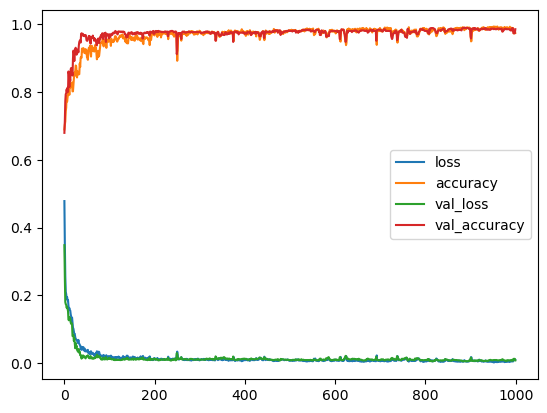

In [186]:
losses.plot()

In [187]:
predictions = model.predict(X_test)

19/19 [==============================] - 0s 2ms/step


In [188]:
predictions = np.rint(predictions)

In [189]:
predictions[0:20]

array([[1., 0., 0.],
       [1., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [190]:
y_test[0:20]

array([[1, 0, 0],
       [1, 1, 0],
       [0, 1, 0],
       [0, 0, 0],
       [1, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [191]:
model.save('models/tt_project.h5')